#### Fuel Economy Data
This information is provided by the U.S. Environmental Protection Agency, Office of Mobile Sources, National Vehicle and Fuel Emissions Laboratory.
The analysis uses data from 2008 and 2018.

Link: https://www.fueleconomy.gov/feg/download.shtml

### Data visualisation 

Using clean data stored in [clean_08.csv] and [clean_18.csv]

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')  #https://seaborn.pydata.org/tutorial/aesthetics.html

%matplotlib inline

In [2]:
df_ca_08 = pd.read_csv('clean_08.csv')
df_ca_08.head(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no


In [3]:
df_ca_18 = pd.read_csv('clean_18.csv')
df_ca_18.head(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No


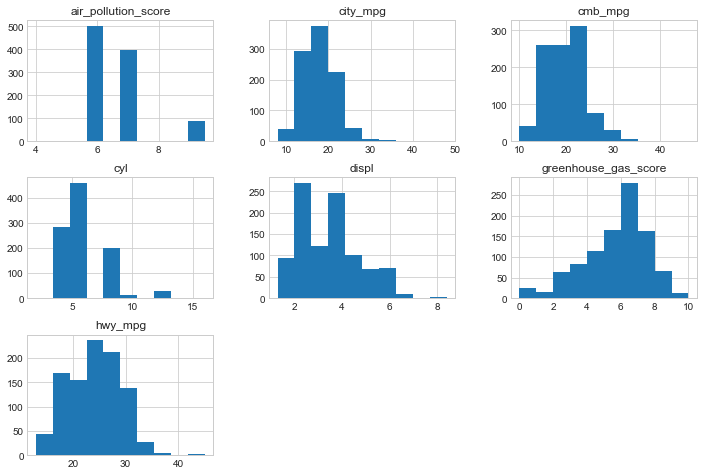

In [72]:
df_ca_08.hist(figsize=(12,8));

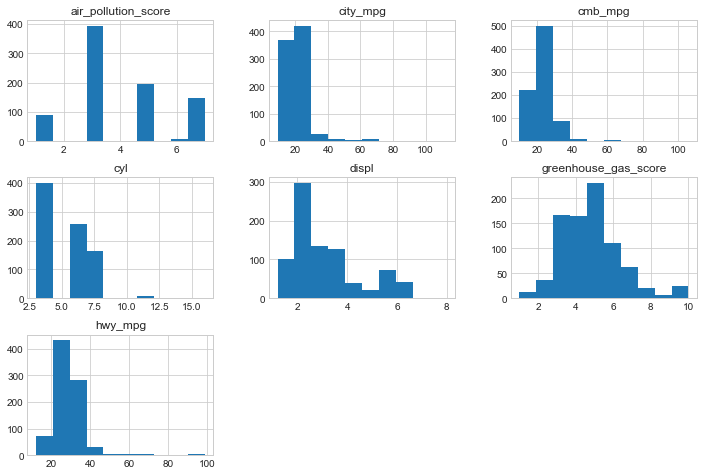

In [73]:
df_ca_18.hist(figsize=(12,8));

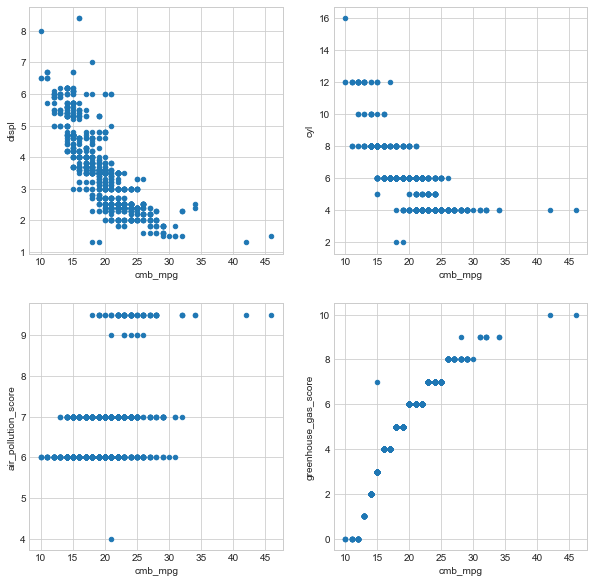

In [74]:
rows = 2
cols = 2

fig = plt.figure(figsize = (10,10), tight_layout=False)
count = 1

for col in ['displ','cyl', 'air_pollution_score', 'greenhouse_gas_score']:  
    ax = fig.add_subplot(rows,cols,count) 
    df_ca_08.plot(x = 'cmb_mpg', y = col, kind = 'scatter', ax=ax);
    count += 1

In [7]:
year_08 = np.repeat('2008', len(df_ca_08.index))
year_18 = np.repeat('2018', len(df_ca_18.index))

In [8]:
df_ca_08['year'] = year_08
df_ca_18['year'] = year_18

In [9]:
df_fuel = df_ca_08.append(df_ca_18, ignore_index=True, sort=False)
df_fuel.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,year
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no,2008
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no,2008
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no,2008
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes,2008
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes,2008


In [10]:
df_fuel.tail()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,year
1814,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5.0,13.0,17.0,14.0,1,No,2018
1815,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5.0,13.0,17.0,15.0,2,No,2018
1816,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7.0,70.0,72.0,71.0,10,Elite,2018
1817,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7.0,60.0,58.0,59.0,10,Elite,2018
1818,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Electricity,standard SUV,7.0,63.0,61.0,62.0,10,Elite,2018


###### Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

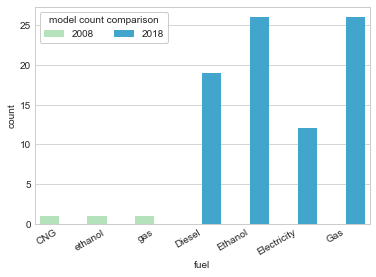

In [95]:
alt_fuel = df_fuel[df_fuel['fuel'] != 'Gasoline']

ax = sns.countplot(data = alt_fuel, x = 'fuel', hue = 'year', palette='GnBu', saturation=1);
ax.legend(loc = 'upper left', ncol = 3, framealpha = 1, title = 'model count comparison', frameon = True);
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha = 'right');

##### Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?

In [12]:
df_vc = df_fuel.groupby(['veh_class','year'], as_index = False)['cmb_mpg'].mean()
df_vc

,veh_class,year,cmb_mpg
0,SUV,2008,18.471429
1,large car,2008,18.509091
2,large car,2018,23.409091
3,midsize car,2008,21.601449
4,midsize car,2018,27.884058
5,minivan,2008,19.117647
6,minivan,2018,20.800000
7,pickup,2008,16.277108
8,pickup,2018,18.589744
9,small SUV,2018,24.074074


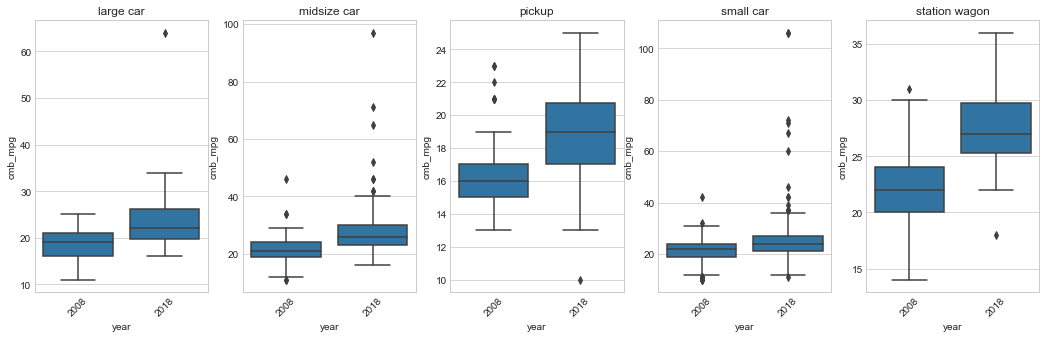

In [76]:
plt.figure(figsize = [18, 5])

vehclass = ['large car', 'midsize car', 'pickup', 'small car', 'station wagon']

count = 1

for veh in vehclass: 
    plt.subplot(1, 5, count)
    base_color = sns.color_palette()[0]
    sns.boxplot(data = df_fuel[df_fuel['veh_class'] == veh], x = 'year', y = 'cmb_mpg',
                   color = base_color);
    plt.xticks(rotation = 45)
    plt.title(veh)
    count += 1;

##### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

In [19]:
df_sw = df_fuel.groupby(['smartway','year'], as_index = False).mean()
df_sw

,smartway,year,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
0,Elite,2018,1.970588,4.000000,7.000000,53.235294,53.117647,53.000000,10.000000
1,No,2018,3.270304,5.720994,3.798343,19.325967,26.708564,22.041436,4.276243
2,Yes,2018,1.753846,3.923077,4.879121,31.483516,39.296703,34.439560,7.538462
3,no,2008,4.056837,6.771005,6.293245,15.133443,21.299835,17.316310,4.149918
4,yes,2008,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421


C:\Users\vilij\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


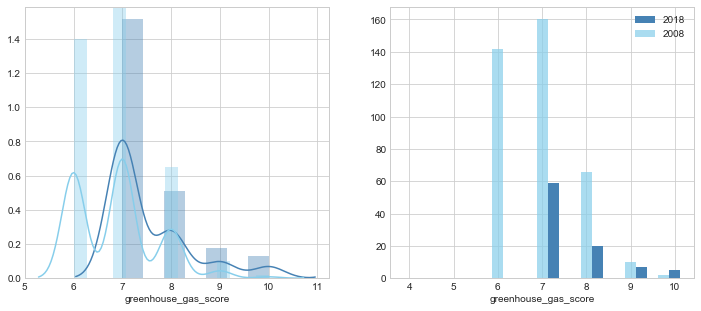

In [90]:
plt.figure(figsize = [12,5])

plt.subplot(1,2,1)
sns.distplot(df_fuel[(df_fuel['smartway'] == "Yes")&(df_fuel['year'] == "2018")]['greenhouse_gas_score'], color = 'steelblue')
sns.distplot(df_fuel[(df_fuel['smartway'] == "yes")&(df_fuel['year'] == "2008")]['greenhouse_gas_score'], color = 'skyblue');

bins = np.arange(4, 10.1, 0.25)
plt.subplot(1,2,2)
plt.hist(df_fuel[(df_fuel['smartway'] == "Yes")&(df_fuel['year'] == "2018")]['greenhouse_gas_score'], bins, alpha=1, label='2018', align='right', color = 'steelblue')
plt.hist(df_fuel[(df_fuel['smartway'] == "yes")&(df_fuel['year'] == "2008")]['greenhouse_gas_score'], bins, alpha=0.7, label='2008', align='left', color = 'skyblue')
plt.legend(loc='upper right')
plt.xlabel("greenhouse_gas_score")
plt.show()

C:\Users\vilij\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


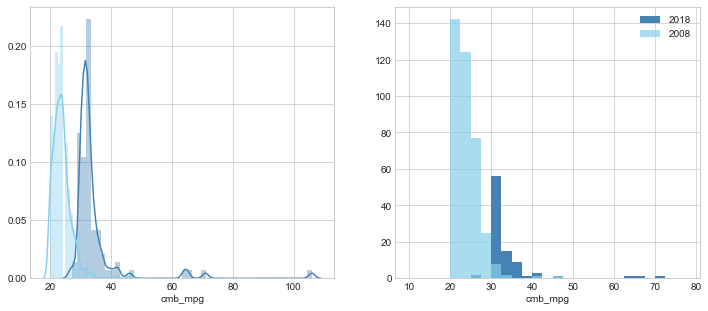

In [89]:
plt.figure(figsize = [12,5])

plt.subplot(1,2,1)
sns.distplot(df_fuel[(df_fuel['smartway'] == "Yes")&(df_fuel['year'] == "2018")]['cmb_mpg'], color = 'steelblue')
sns.distplot(df_fuel[(df_fuel['smartway'] == "yes")&(df_fuel['year'] == "2008")]['cmb_mpg'], color = 'skyblue');

bins = np.arange(10, 80, 2.5)
plt.subplot(1,2,2)
plt.hist(df_fuel[(df_fuel['smartway'] == "Yes")&(df_fuel['year'] == "2018")]['cmb_mpg'], bins, alpha=1, label='2018', color = 'steelblue')
plt.hist(df_fuel[(df_fuel['smartway'] == "yes")&(df_fuel['year'] == "2008")]['cmb_mpg'], bins, alpha=0.7, label='2008', color = 'skyblue')
plt.legend(loc='upper right')
plt.xlabel("cmb_mpg")
plt.show()

##### Q4: What features are associated with better fuel economy (mpg)?

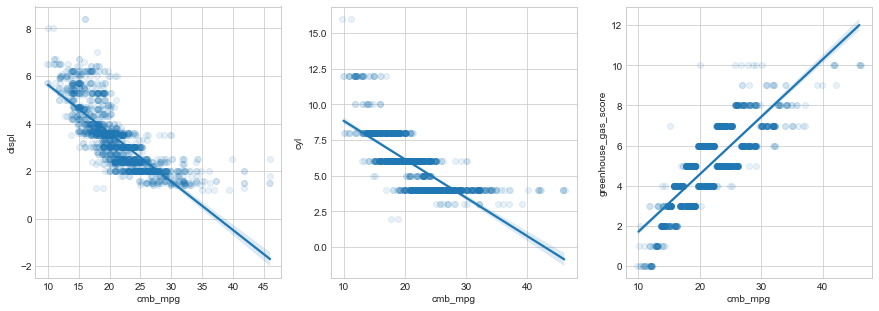

In [112]:
rows = 1
cols = 3

fig = plt.figure(figsize = (15,5), tight_layout=False)
count = 1
fuel_cn = df_fuel[(df_fuel['cmb_mpg'] < 50)]

for col in ['displ','cyl', 'greenhouse_gas_score']:  
    ax = fig.add_subplot(rows,cols,count) 
    sns.regplot(data = fuel_cn, x = 'cmb_mpg', y = col, fit_reg = True, x_jitter= 0.3,
           scatter_kws= {'alpha' : 1/10}, truncate=True, ax=ax);
    count += 1

##### Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [161]:
df_fuel[df_fuel['model'] == 'AUDI Q7']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,year
31,AUDI Q7,3.6,6,Auto-S6,4WD,Gasoline,SUV,6.0,14.0,20.0,16.0,4,no,2008
32,AUDI Q7,4.2,8,Auto-S6,4WD,Gasoline,SUV,6.0,12.0,17.0,14.0,2,no,2008
1015,AUDI Q7,2.0,4,SemiAuto-8,4WD,Gasoline,standard SUV,3.0,19.0,25.0,21.0,4,No,2018
1016,AUDI Q7,3.0,6,SemiAuto-8,4WD,Gasoline,standard SUV,3.0,19.0,25.0,21.0,4,No,2018


##### Comparing improvement in displacement for each model with the same dispolacement and cylinder size

In [164]:
df_fuel['model_detail'] = df_fuel['model'] + df_fuel['displ'].astype(str) + df_fuel['cyl'].astype(str)

In [165]:
df_fuel.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,year,model_detail
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no,2008,ACURA MDX3.76


In [168]:
mod_08 = df_fuel[df_fuel['year'] == '2008'].groupby(['model_detail']).cmb_mpg.mean()
mod_08.head()

model_detail
ACURA MDX3.76    17.0
ACURA RDX2.34    19.0
ACURA RL3.56     19.0
ACURA TL3.26     21.0
ACURA TL3.56     20.5
Name: cmb_mpg, dtype: float64

In [169]:
mod_18 = df_fuel[df_fuel['year'] == '2018'].groupby(['model_detail']).cmb_mpg.mean()
mod_18.head()

model_detail
ACURA RDX3.56               22.5
ACURA TLX AWD A-SPEC3.56    23.0
ACURA TLX FWD A-SPEC3.56    23.0
ACURA TLX2.44               27.0
ACURA TLX3.56               24.0
Name: cmb_mpg, dtype: float64

In [182]:
inc = mod_18 - mod_08
inc.dropna().head()

model_detail
AUDI A32.04             3.5
AUDI A42.04             3.0
AUDI TT Coupe2.04       0.0
AUDI TT Roadster2.04    1.0
BMW Alpina B74.48       1.0
Name: cmb_mpg, dtype: float64

In [183]:
inc[inc == inc.max()]

model_detail
SUBARU Legacy2.54    7.714286
Name: cmb_mpg, dtype: float64

##### Comparing improvement in displacement for each model on average

In [188]:
avrmod_08 = df_fuel[df_fuel['year'] == '2008'].groupby(['model']).cmb_mpg.mean()
avrmod_18 = df_fuel[df_fuel['year'] == '2018'].groupby(['model']).cmb_mpg.mean()
avrmod_08.head()

model
ACURA MDX    17.000000
ACURA RDX    19.000000
ACURA RL     19.000000
ACURA TL     20.666667
ACURA TSX    22.500000
Name: cmb_mpg, dtype: float64

In [189]:
avrinc = avrmod_18 - avrmod_08
avrinc.dropna().head()

model
ACURA RDX    3.500000
AUDI A3      4.666667
AUDI A4      6.000000
AUDI A6      6.000000
AUDI A8 L    5.500000
Name: cmb_mpg, dtype: float64

In [190]:
avrinc[avrinc == avrinc.max()]

model
VOLVO XC 90    16.533333
Name: cmb_mpg, dtype: float64

##### Bonus: Practice of merging datasets

In [191]:
# rename 2008 columns
df_08 = df_ca_08.rename(columns=lambda x: x[:10] + "_2008")

In [192]:
# view to check names
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008,year_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no,2008
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no,2008
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no,2008
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes,2008
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes,2008


In [193]:
# merge datasets
df_combined = df_08.merge(df_ca_18, left_on=['model_2008','displ_2008','cyl_2008'], right_on=['model','displ','cyl'], how='inner')

In [194]:
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,year
0,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No,2018
1,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No,2018
2,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No,2018
3,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No,2018
4,AUDI A4,2.0,4,Auto-AV,2WD,Gasoline,small car,7.0,21.0,30.0,...,4WD,Gasoline,small car,5.0,24.0,34.0,27.0,6,No,2018


In [195]:
df_combined.shape

(179, 28)